In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Churn_Modelling.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rjmanoj/credit-card-customer-churn-prediction",
  file_path
)

c:\Users\aksha\OneDrive\Desktop\DL\tfenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\aksha\AppData\Local\Temp\ipykernel_5536\1961628683.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 669k/669k [00:02<00:00, 250kB/s]


In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [13]:
X = df.drop(columns='Exited')
y = df['Exited'].copy()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, random_state=42)

In [22]:
scaler = StandardScaler()
scaler.set_output(transform='pandas')

xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [23]:
xtrain_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5866,0.874378,1.328762,1.028955,0.761715,0.803861,-1.554124,0.967204,1.237787,-0.576529,-0.580429,-1.107032
1938,-1.371272,-0.092881,-0.699103,0.234517,-0.914771,-1.554124,0.967204,1.095526,-0.576529,-0.580429,0.903316
4194,-0.812446,1.423538,1.374567,0.337508,-0.914771,0.643449,0.967204,1.679687,1.734518,-0.580429,-1.107032
6332,-0.326061,-0.377209,-0.353492,0.225786,-0.914771,0.643449,0.967204,-1.378660,-0.576529,-0.580429,-1.107032
1,-0.439896,0.191448,-1.390327,0.119901,-0.914771,-1.554124,0.967204,0.226947,-0.576529,1.722862,-1.107032
...,...,...,...,...,...,...,...,...,...,...,...
3254,-1.019419,1.044433,-0.353492,0.718917,-0.914771,0.643449,-1.033908,0.313566,1.734518,-0.580429,0.903316
4644,0.636360,3.319061,-0.007880,-1.223565,0.803861,-1.554124,-1.033908,0.905641,-0.576529,1.722862,0.903316
8942,0.170672,-0.187657,1.374567,-0.072798,0.803861,0.643449,0.967204,-0.555157,-0.576529,-0.580429,-1.107032
2935,0.377644,-0.377209,1.028955,0.395311,0.803861,0.643449,-1.033908,-1.349126,-0.576529,1.722862,0.903316


In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()

model.add(Dense(5, activation='sigmoid', input_dim=11))
model.add(Dense(1, activation='sigmoid'))

c:\Users\aksha\OneDrive\Desktop\DL\tfenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [33]:
history = model.fit(xtrain_scaled, ytrain, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6763 - loss: 0.6338 - val_accuracy: 0.8053 - val_loss: 0.5745
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.5403 - val_accuracy: 0.8120 - val_loss: 0.5015
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4918 - val_accuracy: 0.8080 - val_loss: 0.4682
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4717 - val_accuracy: 0.8080 - val_loss: 0.4542
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4603 - val_accuracy: 0.8100 - val_loss: 0.4456
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4519 - val_accuracy: 0.8133 - val_loss: 0.4394
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4454 - val_accuracy: 0.8187 - val_loss: 0.4346
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4402 - val_accu

In [34]:
ypred = model.predict(xtest_scaled)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [40]:
ypred = np.where(ypred.flatten() > 0.5, 1, 0)

In [42]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1991
           1       0.75      0.32      0.45       509

    accuracy                           0.84      2500
   macro avg       0.80      0.65      0.68      2500
weighted avg       0.83      0.84      0.81      2500



In [45]:
import matplotlib.pyplot as plt

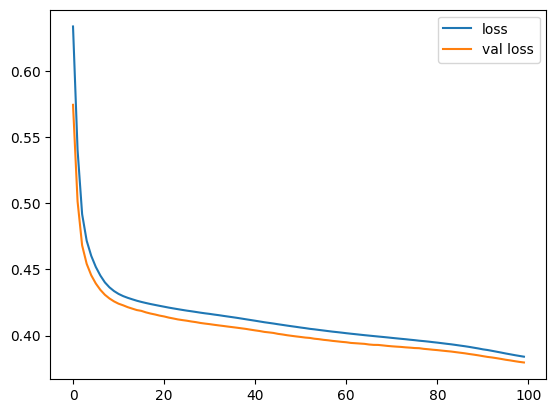

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

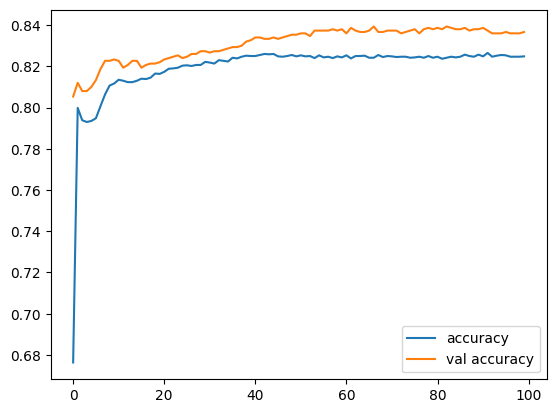

In [52]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()